In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
star_wars = pd.read_csv("star_wars.csv",encoding="ISO-8859-1")
print(star_wars.head(2))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
0  Star Wars: Episode II  Attack of the Clones   
1  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
0  Star Wars: Episode III  Revenge of the Sith   
1  Star Wars: 

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
print(star_wars.shape)
star_wars = star_wars[star_wars["RespondentID"].notnull()]
print(star_wars.shape)

(1187, 38)
(1186, 38)


In [5]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [6]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
yes_no ={
    "Yes":True,
    "No":False
}

In [8]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

In [9]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [10]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].head(16)

1      True
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15     True
16     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool

In [11]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [12]:

movie_mapping = { "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False,
    "Star Wars: Episode II Attack of the Clones":True,
    "Star Wars: Episode III Revenge of the Sith":True,
            "Star Wars: Episode IV A New Hope":True,
            "Star Wars: Episode V The Empire Strikes Back":True,
            "Star Wars: Episode VI Return of the Jedi":True}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [13]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "watched_1",
        "Unnamed: 4": "watched_2",
        "Unnamed: 5": "watched_3",
        "Unnamed: 6": "watched_4",
        "Unnamed: 7": "watched_5",
        "Unnamed: 8": "watched_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,watched_1,watched_2,watched_3,watched_4,watched_5,watched_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,NaN,NaN,NaN,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,NaN,NaN,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,NaN,NaN,NaN,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,NaN,NaN,NaN,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [14]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [15]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head(0)[9:15]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,watched_1,watched_2,watched_3,watched_4,watched_5,watched_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)


In [16]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

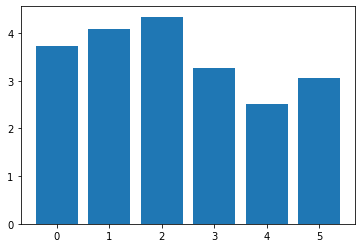

In [18]:
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

In [19]:
star_wars[star_wars.columns[3:9]].sum()

watched_1    673.0
watched_2      0.0
watched_3      0.0
watched_4      0.0
watched_5    758.0
watched_6    738.0
dtype: float64

<BarContainer object of 6 artists>

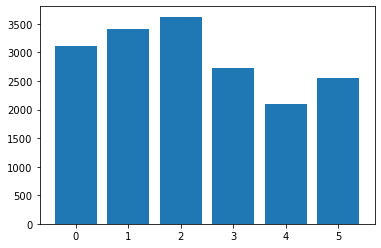

In [20]:
plt.bar(range(6), star_wars[star_wars.columns[9:15]].sum())

In [21]:
fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
non_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

In [22]:
trek = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
non_trek = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

In [23]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

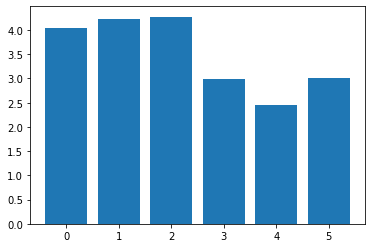

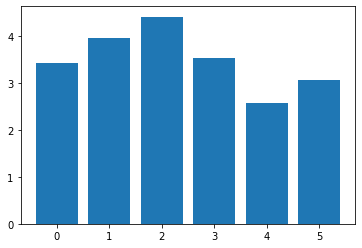

In [24]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()

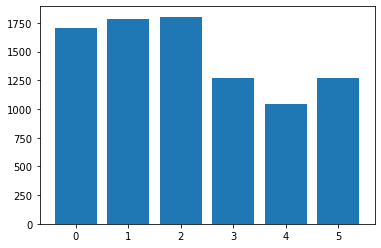

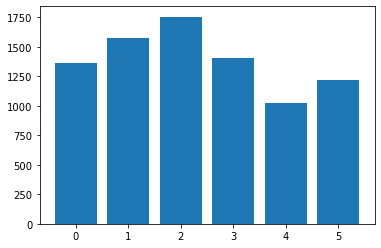

In [25]:
plt.bar(range(6), males[males.columns[9:15]].sum())
plt.show()

plt.bar(range(6), females[females.columns[9:15]].sum())
plt.show()

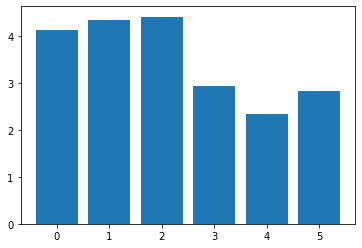

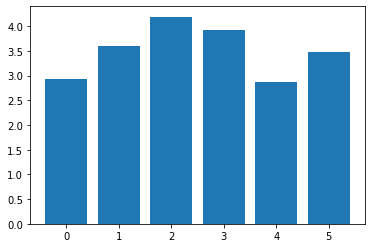

In [26]:
plt.bar(range(6), fan[fan.columns[9:15]].mean())
plt.show()

plt.bar(range(6), non_fan[non_fan.columns[9:15]].mean())
plt.show()

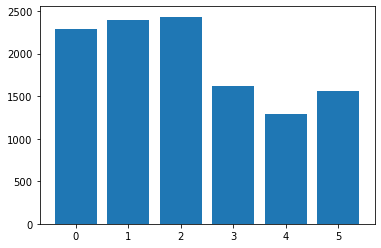

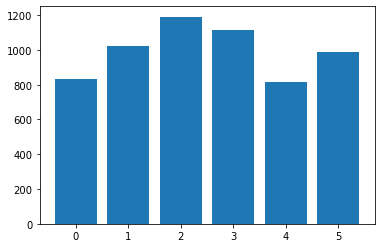

In [27]:
plt.bar(range(6), fan[fan.columns[9:15]].sum())
plt.show()

plt.bar(range(6), non_fan[non_fan.columns[9:15]].sum())
plt.show()

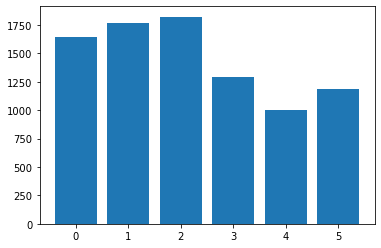

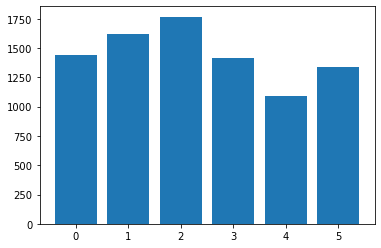

In [28]:
plt.bar(range(6), trek[trek.columns[9:15]].sum())
plt.show()

plt.bar(range(6), non_trek[non_trek.columns[9:15]].sum())
plt.show()

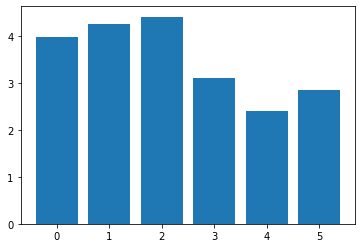

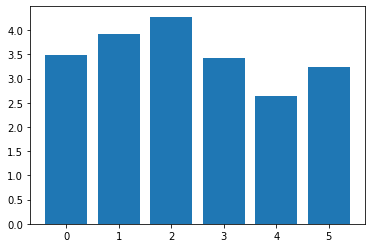

In [29]:
plt.bar(range(6), trek[trek.columns[9:15]].mean())
plt.show()

plt.bar(range(6), non_trek[non_trek.columns[9:15]].mean())
plt.show()

In [30]:
print(trek.head(5))

    RespondentID  \
2   3.292880e+09   
4   3.292763e+09   
6   3.292719e+09   
8   3.292664e+09   
16  3.292583e+09   

    Have you seen any of the 6 films in the Star Wars franchise?  \
2                                               False              
4                                                True              
6                                                True              
8                                                True              
16                                               True              

   Do you consider yourself to be a fan of the Star Wars film franchise?  \
2                                                 NaN                      
4                                                True                      
6                                                True                      
8                                                True                      
16                                               True                      

    watched_1

In [31]:
colus= ['Education','Location (Census Region)']
star_wars[colus]

,Education,Location (Census Region)
1,High school degree,South Atlantic
2,Bachelor degree,West South Central
3,High school degree,West North Central
4,Some college or Associate degree,West North Central
5,Some college or Associate degree,West North Central
...,...,...
1182,Some college or Associate degree,East North Central
1183,Bachelor degree,Mountain
1184,Bachelor degree,Middle Atlantic
1185,Some college or Associate degree,East North Central


In [32]:
star_wars['Location (Census Region)'].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

In [33]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [34]:
star_wars['Age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64

In [35]:
star_wars['Which character shot first?'].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [36]:
star_wars[star_wars.columns[15:29]][:5]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [37]:
star_wars['Household Income'].value_counts()

$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: Household Income, dtype: int64

In [42]:
star_wars = star_wars.rename(columns={
        "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.":"Rate Han Solo",
        "Unnamed: 16": "Rate Luke Skywalker",
        "Unnamed: 17": "Rate Princess Leia Organa",
        "Unnamed: 18": "Rate Anakin Skywalker",
        "Unnamed: 19": "Rate Obi Wan Kenobi",
        "Unnamed: 20": "Rate Emperor Palpatine",
        "Unnamed: 21": "Rate Darth Vader",
        "Unnamed: 22": "Rate Lando Calrissian",
        "Unnamed: 23": "Rate Boba Fett",
        "Unnamed: 24": "Rate C-3P0",
        "Unnamed: 25": "Rate R2 D2",
        "Unnamed: 26": "Rate Jar Jar Binks",
        "Unnamed: 27": "Rate Padme Amidala",
        "Unnamed: 28": "Rate Yoda"    
        })



In [44]:
star_wars = star_wars.rename(columns={
        "Rate Han Solo":"Rate_Han_Solo",
        "Rate Luke Skywalker":"Rate_Luke_Skywalker",
        "Rate Princess Leia Organa":"Rate_Princess_Leia_Organa",
        "Rate Anakin Skywalker":"Rate_Anakin_Skywalker",
        "Rate Obi Wan Kenobi":"Rate_Obi_Wan_Kenobi",
        "Rate Emperor Palpatine":"Rate_Emperor_Palpatine",
        "Rate Darth Vader":"Rate_Darth_Vader",
        "Rate Lando Calrissian":"Rate_Lando_Calrissian",
        "Rate Boba Fett":"Rate_Boba_Fett",
        "Rate C-3P0":"Rate_C-3P0",
        "Rate R2 D2":"Rate_R2_D2",
        "Rate Jar Jar Binks":"Rate_Jar_Binks",
        "Rate Padme Amidala":"Rate_Padme_Amidala",
        "Rate Yoda":"Rate_Yoda"    
        })

In [45]:
characters_dict_favor = {}


In [46]:
characters_dict_favor['Han_Solo'] = star_wars['Rate_Han_Solo'].value_counts()['Very favorably']
characters_dict_favor['Luke_Skywalker'] = star_wars['Rate_Luke_Skywalker'].value_counts()['Very favorably']
characters_dict_favor['Han_Solo'] = star_wars['Rate_Han_Solo'].value_counts()['Very favorably']
characters_dict_favor['Princess_Leia_Organa'] = star_wars['Rate_Princess_Leia_Organa'].value_counts()['Very favorably']
characters_dict_favor['Obi_Wan_Kenobi'] = star_wars['Rate_Obi_Wan_Kenobi'].value_counts()['Very favorably']
characters_dict_favor['Emperor_Palpatine'] = star_wars['Rate_Emperor_Palpatine'].value_counts()['Very favorably']
characters_dict_favor['Darth_Vader'] = star_wars['Rate_Darth_Vader'].value_counts()['Very favorably']
characters_dict_favor['Lando_Calrissian'] = star_wars['Rate_Lando_Calrissian'].value_counts()['Very favorably']
characters_dict_favor['Boba_Fett'] = star_wars['Rate_Boba_Fett'].value_counts()['Very favorably']

characters_dict_favor['C-3P0'] = star_wars['Rate_C-3P0'].value_counts()['Very favorably']
characters_dict_favor['Jar_Binks'] = star_wars['Rate_Jar_Binks'].value_counts()['Very favorably']
characters_dict_favor['R2_D2'] = star_wars['Rate_R2_D2'].value_counts()['Very favorably']
characters_dict_favor['Padme_Amidala'] = star_wars['Rate_Padme_Amidala'].value_counts()['Very favorably']
characters_dict_favor['Yoda'] = star_wars['Rate_Yoda'].value_counts()['Very favorably']


In [47]:
characters_dict_favor

{'Han_Solo': 610,
 'Luke_Skywalker': 552,
 'Princess_Leia_Organa': 547,
 'Obi_Wan_Kenobi': 591,
 'Emperor_Palpatine': 110,
 'Darth_Vader': 310,
 'Lando_Calrissian': 142,
 'Boba_Fett': 138,
 'C-3P0': 474,
 'Jar_Binks': 112,
 'R2_D2': 562,
 'Padme_Amidala': 168,
 'Yoda': 605}

In [48]:
star_wars['Rate_Han_Solo'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Rate_Han_Solo, dtype: int64

In [49]:
characters_dict_unfavor = {}

In [50]:
characters_dict_unfavor['Han_Solo'] = star_wars['Rate_Han_Solo'].value_counts()['Very unfavorably']
characters_dict_unfavor['Luke_Skywalker'] = star_wars['Rate_Luke_Skywalker'].value_counts()['Very unfavorably']
characters_dict_unfavor['Han_Solo'] = star_wars['Rate_Han_Solo'].value_counts()['Very unfavorably']
characters_dict_unfavor['Princess_Leia_Organa'] = star_wars['Rate_Princess_Leia_Organa'].value_counts()['Very unfavorably']
characters_dict_unfavor['Obi_Wan_Kenobi'] = star_wars['Rate_Obi_Wan_Kenobi'].value_counts()['Very unfavorably']
characters_dict_unfavor['Emperor_Palpatine'] = star_wars['Rate_Emperor_Palpatine'].value_counts()['Very unfavorably']
characters_dict_unfavor['Darth_Vader'] = star_wars['Rate_Darth_Vader'].value_counts()['Very unfavorably']
characters_dict_unfavor['Lando_Calrissian'] = star_wars['Rate_Lando_Calrissian'].value_counts()['Very unfavorably']
characters_dict_unfavor['Boba_Fett'] = star_wars['Rate_Boba_Fett'].value_counts()['Very unfavorably']

characters_dict_unfavor['C-3P0'] = star_wars['Rate_C-3P0'].value_counts()['Very unfavorably']
characters_dict_unfavor['Jar_Binks'] = star_wars['Rate_Jar_Binks'].value_counts()['Very unfavorably']
characters_dict_unfavor['R2_D2'] = star_wars['Rate_R2_D2'].value_counts()['Very unfavorably']
characters_dict_unfavor['Padme_Amidala'] = star_wars['Rate_Padme_Amidala'].value_counts()['Very unfavorably']
characters_dict_unfavor['Yoda'] = star_wars['Rate_Yoda'].value_counts()['Very unfavorably']


In [51]:
characters_dict_unfavor

{'Han_Solo': 1,
 'Luke_Skywalker': 3,
 'Princess_Leia_Organa': 6,
 'Obi_Wan_Kenobi': 7,
 'Emperor_Palpatine': 124,
 'Darth_Vader': 149,
 'Lando_Calrissian': 8,
 'Boba_Fett': 45,
 'C-3P0': 7,
 'Jar_Binks': 204,
 'R2_D2': 6,
 'Padme_Amidala': 34,
 'Yoda': 8}

In [52]:
characters_dict_neutral ={}

In [53]:
characters_dict_neutral['Han_Solo'] = star_wars['Rate_Han_Solo'].value_counts()['Neither favorably nor unfavorably (neutral)']
characters_dict_neutral['Luke_Skywalker'] = star_wars['Rate_Luke_Skywalker'].value_counts()['Neither favorably nor unfavorably (neutral)']
characters_dict_neutral['Han_Solo'] = star_wars['Rate_Han_Solo'].value_counts()['Neither favorably nor unfavorably (neutral)']
characters_dict_neutral['Princess_Leia_Organa'] = star_wars['Rate_Princess_Leia_Organa'].value_counts()['Neither favorably nor unfavorably (neutral)']
characters_dict_neutral['Obi_Wan_Kenobi'] = star_wars['Rate_Obi_Wan_Kenobi'].value_counts()['Neither favorably nor unfavorably (neutral)']
characters_dict_neutral['Emperor_Palpatine'] = star_wars['Rate_Emperor_Palpatine'].value_counts()['Neither favorably nor unfavorably (neutral)']
characters_dict_neutral['Darth_Vader'] = star_wars['Rate_Darth_Vader'].value_counts()['Neither favorably nor unfavorably (neutral)']
characters_dict_neutral['Lando_Calrissian'] = star_wars['Rate_Lando_Calrissian'].value_counts()['Neither favorably nor unfavorably (neutral)']
characters_dict_neutral['Boba_Fett'] = star_wars['Rate_Boba_Fett'].value_counts()['Neither favorably nor unfavorably (neutral)']

characters_dict_neutral['C-3P0'] = star_wars['Rate_C-3P0'].value_counts()['Neither favorably nor unfavorably (neutral)']
characters_dict_neutral['Jar_Binks'] = star_wars['Rate_Jar_Binks'].value_counts()['Neither favorably nor unfavorably (neutral)']
characters_dict_neutral['R2_D2'] = star_wars['Rate_R2_D2'].value_counts()['Neither favorably nor unfavorably (neutral)']
characters_dict_neutral['Padme_Amidala'] = star_wars['Rate_Padme_Amidala'].value_counts()['Neither favorably nor unfavorably (neutral)']
characters_dict_neutral['Yoda'] = star_wars['Rate_Yoda'].value_counts()['Neither favorably nor unfavorably (neutral)']


In [54]:
characters_dict_neutral

{'Han_Solo': 44,
 'Luke_Skywalker': 38,
 'Princess_Leia_Organa': 48,
 'Obi_Wan_Kenobi': 43,
 'Emperor_Palpatine': 213,
 'Darth_Vader': 84,
 'Lando_Calrissian': 236,
 'Boba_Fett': 248,
 'C-3P0': 79,
 'Jar_Binks': 164,
 'R2_D2': 57,
 'Padme_Amidala': 207,
 'Yoda': 51}

('Boba_Fett', 'Lando_Calrissian', 'Emperor_Palpatine', 'Padme_Amidala', 'Jar_Binks', 'Darth_Vader', 'C-3P0', 'R2_D2', 'Yoda', 'Princess_Leia_Organa', 'Han_Solo', 'Obi_Wan_Kenobi', 'Luke_Skywalker')
(248, 236, 213, 207, 164, 84, 79, 57, 51, 48, 44, 43, 38)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


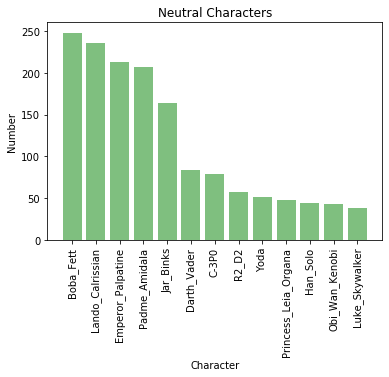

In [55]:
lists = sorted(characters_dict_neutral.items(), key=lambda kv: kv[1], reverse=True)

x, y = zip(*lists) # unpack a list of pairs into two tuples
print(x)
print(y)

y_pos = np.arange(len(x))
print(y_pos)
plt.bar(y_pos, y, align='center', alpha=0.5,color='g',label='Neutral')
plt.xticks(y_pos, x,rotation=90)
plt.ylabel('Number')
plt.xlabel('Character')

plt.title('Neutral Characters')

plt.show()

('Han_Solo', 'Yoda', 'Obi_Wan_Kenobi', 'R2_D2', 'Luke_Skywalker', 'Princess_Leia_Organa', 'C-3P0', 'Darth_Vader', 'Padme_Amidala', 'Lando_Calrissian', 'Boba_Fett', 'Jar_Binks', 'Emperor_Palpatine')
(610, 605, 591, 562, 552, 547, 474, 310, 168, 142, 138, 112, 110)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


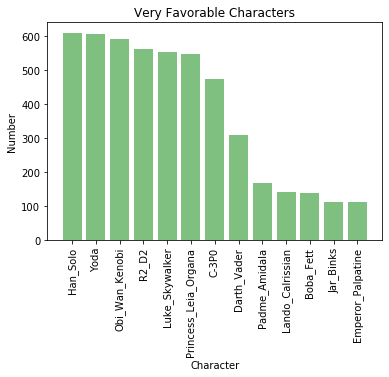

In [56]:
lists = sorted(characters_dict_favor.items(), key=lambda kv: kv[1], reverse=True)

x, y = zip(*lists) # unpack a list of pairs into two tuples
print(x)
print(y)

y_pos = np.arange(len(x))
print(y_pos)
plt.bar(y_pos, y, align='center', alpha=0.5,color='g',label='Highly Favorable')
plt.xticks(y_pos, x,rotation=90)
plt.ylabel('Number')
plt.xlabel('Character')

plt.title('Very Favorable Characters')

plt.show()

('Jar_Binks', 'Darth_Vader', 'Emperor_Palpatine', 'Boba_Fett', 'Padme_Amidala', 'Lando_Calrissian', 'Yoda', 'Obi_Wan_Kenobi', 'C-3P0', 'Princess_Leia_Organa', 'R2_D2', 'Luke_Skywalker', 'Han_Solo')
(204, 149, 124, 45, 34, 8, 8, 7, 7, 6, 6, 3, 1)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


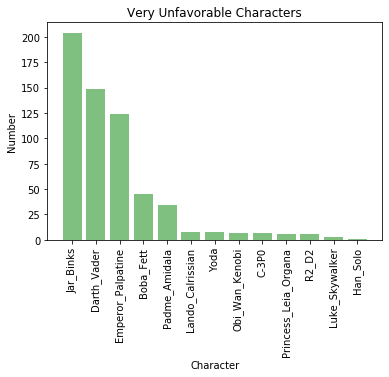

In [57]:
lists = sorted(characters_dict_unfavor.items(), key=lambda kv: kv[1], reverse=True)

x, y = zip(*lists) # unpack a list of pairs into two tuples
print(x)
print(y)

y_pos = np.arange(len(x))
print(y_pos)
plt.bar(y_pos, y, align='center', alpha=0.5,color='g',label='Highly Unfavorable')
plt.xticks(y_pos, x,rotation=90)
plt.ylabel('Number')
plt.xlabel('Character')

plt.title('Very Unfavorable Characters')

plt.show()